# Análisis Exploratorio de Datos (EDA)

In [10]:
from funciones_1 import *

In [12]:
df_compas_raw_risk_of_reicidivism = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_raw_risk_of_reicidivism.csv", delimiter=',')
df_compas_2y = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/main/users/Grupo/df_compas_2y.csv", delimiter=',')

## Análisis del Dataset1: "Compas-scores"

### 1. Distribución Demográfica

In [13]:
# Agrupar por 'Person_ID' y tomar el primer valor de 'Sex_Code_Text' y 'Ethnic_Code_Text'
grouped_by_way = df_compas_raw_risk_of_reicidivism.groupby('Person_ID').agg({
    'Sex_Code_Text': 'first',
    'Ethnic_Code_Text': 'first',
    'MaritalStatus': 'first',
    'ScoreText': 'first',
    'DecileScore': 'first',
    'age': 'first',
    'RecSupervisionLevelText': 'first'
})

grouped_by_way

,Sex_Code_Text,Ethnic_Code_Text,MaritalStatus,ScoreText,DecileScore,age,RecSupervisionLevelText
Person_ID,,,,,,,
656,Female,African-American,Single,High,9,33,High
667,Male,African-American,Single,Medium,5,26,Medium
684,Female,Caucasian,Single,High,9,33,Medium with Override Consideration
737,Male,Caucasian,Single,High,8,24,Medium with Override Consideration
745,Male,African-American,Single,Low,3,32,Low
...,...,...,...,...,...,...,...
68600,Female,Caucasian,Single,Low,1,45,Low
68602,Female,Caucasian,Single,Medium,5,20,Low
68603,Male,Caucasian,Single,Medium,5,29,Low


In [48]:
# Distribución por puntuación (número de entradas según la puntuación)

decile_distribution = grouped_by_way['DecileScore'].value_counts()
print(decile_distribution)

 1     4345
 2     2632
 3     2118
 4     1880
 5     1625
 6     1551
 7     1355
 8     1180
 9     1084
 10     806
-1       34
Name: DecileScore, dtype: int64


#### 1.1. Distribución por Género

In [16]:
# Contar la distribución por género
sex_distribution = grouped_by_way['Sex_Code_Text'].value_counts()

# Calcular el porcentaje de cada categoría
sex_distribution_percentage = (sex_distribution / sex_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
sex_distribution_df = sex_distribution.reset_index()
sex_distribution_df.columns = ['Sex_Code_Text', 'Count']
sex_distribution_df['Percentage'] = sex_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura1 = px.bar(sex_distribution_df, 
                 x='Sex_Code_Text', 
                 y='Count', 
                 title='Distribución por Género', 
                 labels={'Sex_Code_Text': 'Género', 'Count': 'Cantidad'}, 
                 color='Sex_Code_Text',
                 category_orders={"Sex_Code_Text": sex_distribution.index},  # Ordenar de mayor a menor
                 text=sex_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(sex_distribution)
print(sex_distribution.sum())

# Mejorar diseño
figura1.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura1.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico
figura1.show()

Male      14443
Female     4167
Name: Sex_Code_Text, dtype: int64
18610


#### 1.2. Distribución por Etnia

In [17]:
# Contar la distribución por etnia
ethnicity_distribution = grouped_by_way['Ethnic_Code_Text'].value_counts()

# Calcular el porcentaje de cada categoría
ethnicity_distribution_percentage = (ethnicity_distribution / ethnicity_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
ethnicity_distribution_df = ethnicity_distribution.reset_index()
ethnicity_distribution_df.columns = ['Ethnic_Code_Text', 'Count']
ethnicity_distribution_df['Percentage'] = ethnicity_distribution_percentage.values

# Crear gráfico ordenado de mayor a menor
figura2 = px.bar(ethnicity_distribution_df, 
                 x='Ethnic_Code_Text', 
                 y='Count', 
                 title='Distribución por Raza', 
                 labels={'Ethnic_Code_Text': 'Raza/Etnia', 'Count': 'Cantidad'}, 
                 color='Ethnic_Code_Text',
                 category_orders={"Ethnic_Code_Text": ethnicity_distribution.index},  # Ordenar de mayor a menor
                 text=ethnicity_distribution_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(ethnicity_distribution, ethnicity_distribution_percentage)
#print(ethnicity_distribution.sum(), ethnicity_distribution_percentage.sum())
# Mejorar diseño
figura2.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura2.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs
figura2.update_traces(
    hovertemplate='<br>Raza=%{x}<br>Total IDs=%{y}'
)

# Mostrar gráfico
figura2.show()

African-American    8125
Caucasian           6742
Hispanic            2728
Other                808
Asian                104
Native American       65
Arabic                25
Oriental              13
Name: Ethnic_Code_Text, dtype: int64 African-American    43.659323
Caucasian           36.227834
Hispanic            14.658786
Other                4.341752
Asian                0.558839
Native American      0.349275
Arabic               0.134336
Oriental             0.069855
Name: Ethnic_Code_Text, dtype: float64


#### 1.3. Distribución por Edad

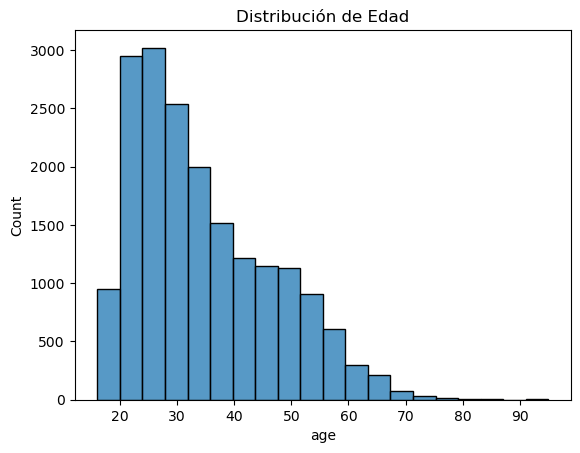

In [18]:
# Distribución de edad
sns.histplot(grouped_by_way['age'], bins=20)
plt.title('Distribución de Edad')
plt.show()

#### 1.4. Distribución por Estado Civil

In [19]:
import plotly.express as px

# Contar la distribución por estado civil
marital_status_distribution = grouped_by_way['MaritalStatus'].value_counts()

# Calcular el porcentaje de cada categoría
marital_status_percentage = (marital_status_distribution / marital_status_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
marital_status_df = marital_status_distribution.reset_index()
marital_status_df.columns = ['MaritalStatus', 'Count']
marital_status_df['Percentage'] = marital_status_percentage.values

# Crear gráfico ordenado de mayor a menor
figura4 = px.bar(marital_status_df, 
                 x='MaritalStatus', 
                 y='Count', 
                 title='Distribución por Estado Civil', 
                 labels={'MaritalStatus': 'Estado Civil', 'Count': 'Cantidad'}, 
                 color='MaritalStatus',
                 category_orders={"MaritalStatus": marital_status_distribution.index},  # Ordenar de mayor a menor
                 text=marital_status_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(marital_status_distribution)
# Mejorar diseño
figura4.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura4.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Personalizar el tooltip para mostrar la suma total de IDs y el estado civil
figura4.update_traces(
    hovertemplate='<br>Estado Civil=%{x}<br>Total IDs=%{y}'
)

# Mostrar gráfico
figura4.show()

Single               13718
Married               2561
Divorced              1200
Separated              553
Significant Other      387
Widowed                121
Unknown                 70
Name: MaritalStatus, dtype: int64


#### 1.5. Distribución por Grupo de Riesgo

In [31]:
# Contar la distribución por ScoreText
scoretext_distribution = grouped_by_way['ScoreText'].value_counts()

# Calcular el porcentaje de cada categoría
scoretext_percentage = (scoretext_distribution / scoretext_distribution.sum()) * 100

# Crear un nuevo DataFrame con las frecuencias y porcentajes
scoretext_df = scoretext_distribution.reset_index()
scoretext_df.columns = ['ScoreText', 'Count']
scoretext_df['Percentage'] = scoretext_percentage.values

# Crear gráfico ordenado de mayor a menor
figura5 = px.bar(scoretext_df, 
                 x='ScoreText', 
                 y='Count', 
                 title='Distribución por Grupo de Riesgo (ScoreText)', 
                 labels={'ScoreText': 'Riesgo', 'Count': 'Cantidad'}, 
                 color='ScoreText',  # Puedes eliminar esto si no quieres colorear por categoría
                 category_orders={"ScoreText": scoretext_distribution.index},  # Ordenar de mayor a menor
                 text=scoretext_df['Percentage'].round(2).astype(str) + '%'  # Mostrar porcentaje
                )

print(scoretext_distribution)
# Mejorar diseño
figura5.update_traces(textposition='outside')  # Colocar el texto fuera de las barras
figura5.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico
figura5.show()

Low       10975
Medium     4531
High       3070
Name: ScoreText, dtype: int64


#### 1.6. Distribución por Nivel de supervisión

In [47]:
# Nivel de supervisión recomendado por género usando Plotly
fig_supervision_gender = px.histogram(
    grouped_by_way,
    x='RecSupervisionLevelText',
    color='Sex_Code_Text',
    title='Nivel de Supervisión Recomendado por Género',
    color_discrete_map={'Male': '#1f77b4', 'Female': '#ff00ff'},  # Colores fuertes
    labels={'RecSupervisionLevelText': 'Nivel de Supervisión', 'count': 'Número de Registros'}
)

fig_supervision_gender.update_traces(
    hovertemplate='<br>Nivel de Supervisión=%{x}<br>Género=%{color}<br>Total Registros=%{y}'
)

fig_supervision_gender.update_layout(
    xaxis_title='Nivel de Supervisión',
    yaxis_title='Número de Registros',
    title={'text': 'Nivel de Supervisión Recomendado por Género', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    bargap=0.2
)

fig_supervision_gender.show()

# Nivel de supervisión recomendado por etnicidad usando Plotly
fig_supervision_ethnicity = px.histogram(
    grouped_by_way,
    x='RecSupervisionLevelText',
    color='Ethnic_Code_Text',
    title='Nivel de Supervisión Recomendado por Etnicidad',
    color_discrete_map={
        'African-American': '#1f77b4',  # Azul
        'Caucasian': '#ff00ff',         # Fucsia
        'Hispanic': '#2ca02c',          # Verde
        'Other': '#d62728',            # Rojo
        'Native American': '#9467bd',  # Púrpura
        'Asian': '#8c564b',            # Marrón
        'African-Am': '#e377c2'         # Rosa claro
    },
    labels={'RecSupervisionLevelText': 'Nivel de Supervisión', 'count': 'Número de Registros'}
)

fig_supervision_ethnicity.update_traces(
    hovertemplate='<br>Nivel de Supervisión=%{x}<br>Etnicidad=%{color}<br>Total Registros=%{y}'
)

fig_supervision_ethnicity.update_layout(
    xaxis_title='Nivel de Supervisión',
    yaxis_title='Número de Registros',
    title={'text': 'Nivel de Supervisión Recomendado por Etnicidad', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    bargap=0.2
)

fig_supervision_ethnicity.show()

# Mostrar los porcentajes de distribución para RecSupervisionLevelText por género
supervision_gender_counts = grouped_by_way.groupby('RecSupervisionLevelText')['Sex_Code_Text'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nDistribución de Nivel de Supervisión Recomendado por Género:")
print(supervision_gender_counts)

# Mostrar los porcentajes de distribución para RecSupervisionLevelText por etnicidad
supervision_ethnicity_counts = grouped_by_way.groupby('RecSupervisionLevelText')['Ethnic_Code_Text'].value_counts(normalize=True).unstack().fillna(0) * 100
print("\nDistribución de Nivel de Supervisión Recomendado por Etnicidad:")
print(supervision_ethnicity_counts)


Distribución de Nivel de Supervisión Recomendado por Género:
Sex_Code_Text                          Female       Male
RecSupervisionLevelText                                 
High                                 9.906542  90.093458
Low                                 23.935730  76.064270
Medium                              22.873346  77.126654
Medium with Override Consideration  19.415358  80.584642

Distribución de Nivel de Supervisión Recomendado por Etnicidad:
Ethnic_Code_Text                    African-American    Arabic     Asian  \
RecSupervisionLevelText                                                    
High                                       73.925234  0.093458  0.280374   
Low                                        33.220142  0.140798  0.770250   
Medium                                     56.301197  0.157530  0.189036   
Medium with Override Consideration         67.015707  0.087260  0.087260   

Ethnic_Code_Text                    Caucasian   Hispanic  Native American 

### 2. Estadísticas Descriptivas y Visualización

#### 2.1. Visualización descriptiva del puntuaje de riesgo según las distribuciones anteriores

##### 2.1.1 Puntuación según Genero

In [26]:
# Crear un boxplot de la relación entre género y puntaje de riesgo (DecileScore)
figura6 = px.box(grouped_by_way, 
                 x='Sex_Code_Text', 
                 y='DecileScore', 
                 title='Distribución de DecileScore por Género', 
                 labels={'Sex_Code_Text': 'Género', 'DecileScore': 'Puntaje de Riesgo'},
                 color='Sex_Code_Text',  # Colorear por género
                 category_orders={"Sex_Code_Text": grouped_by_way['Sex_Code_Text'].value_counts().index}  # Ordenar géneros por frecuencia
                )

# Mejorar el diseño del gráfico
figura6.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura6.update_layout(showlegend=False)  # Ocultar la leyenda si no es necesaria

# Mostrar gráfico interactivo
figura6.show()


In [33]:
# Crear histograma de DecileScore por género con barras superpuestas
figura9 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='Sex_Code_Text',  # Color por género
                       title='Gráfico de DecilScore por Género', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura9.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura9.show()

##### 2.1.2 Puntuación según Etnia

In [27]:
# Crear un boxplot de la relación entre etnia y puntaje de riesgo (DecileScore)
figura7 = px.box(grouped_by_way, 
                 x='Ethnic_Code_Text', 
                 y='DecileScore', 
                 title='Distribución de DecileScore por Etnia', 
                 labels={'Ethnic_Code_Text': 'Raza/Etnia', 'DecileScore': 'Puntaje de Riesgo'},
                 color='Ethnic_Code_Text',  # Colorear según la etnia
                 category_orders={"Ethnic_Code_Text": grouped_by_way['Ethnic_Code_Text'].value_counts().index}  # Ordenar etnias por frecuencia
                )

# Mejorar el diseño del gráfico
figura7.update_traces(boxmean='sd')  # Mostrar la media y la desviación estándar
figura7.update_layout(showlegend=False)  # Ocultar leyenda si no es necesaria

# Mostrar gráfico interactivo
figura7.show()

In [30]:
# Crear histograma de DecileScore por raza con barras superpuestas
figura10 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='Ethnic_Code_Text',  # Color por género
                       title='Gráfico de DecilScore por Etnia', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura10.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura10.show()

Analizamos conjuntamente Etnia y Género

In [40]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de puntuaciones en deciles por género y etnicidad usando Plotly
fig_box = px.box(
    grouped_by_way,
    x='Sex_Code_Text',
    y='DecileScore',
    color='Ethnic_Code_Text',
    title='Distribución de Puntuaciones en Deciles por Género y Etnicidad',
    color_discrete_map={
        'African-American': '#1f77b4',  # Azul
        'Caucasian': '#ff00ff',         # Fucsia
        'Hispanic': '#2ca02c',          # Verde
        'Other': '#d62728',            # Rojo
        'Native American': '#9467bd',  # Púrpura
        'Asian': '#8c564b',            # Marrón
        'African-Am': '#e377c2'         # Rosa claro
    }
)

fig_box.update_traces(
    boxmean='sd',  # Muestra la desviación estándar
    hovertemplate='<br>Género=%{x}<br>Decile Score=%{y:.2f}<br>Etnicidad=%{color}<br>'
)

fig_box.update_layout(
    xaxis_title='Género',
    yaxis_title='Puntuación en Deciles',
    title={'text': 'Distribución de DecileScore por Etnia y Género', 'x':0.5},
    xaxis={'categoryorder': 'total descending'},  # Ordenar de mayor a menor
    boxmode='group'
)

fig_box.show()

##### 2.1.3 Puntuación según Edad

In [43]:
# Crear una nueva columna que agrupa la edad en rangos de 10 años
grouped_by_way['AgeGroup'] = pd.cut(grouped_by_way['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Crear histograma de DecileScore por grupo de edad con barras superpuestas
figura_age = px.histogram(grouped_by_way, 
                          x='DecileScore', 
                          color='AgeGroup',  # Colorear por grupo de edad
                          title='Gráfico de DecilScore por grupo de Edad', 
                          nbins=10, 
                          opacity=0.7,  # Transparencia para superposición
                          category_orders={'AgeGroup': ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']}  # Ordenar grupos de edad
                         )

# Mejorar el diseño
figura_age.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura_age.show()

##### 2.1.4 Puntuación según Estado Civil

In [36]:
# Crear histograma de DecileScore por raza con barras superpuestas
figura12 = px.histogram(grouped_by_way, 
                       x='DecileScore', 
                       color='MaritalStatus',  # Color por Estado Civil
                       title='Gráfico de DecilScore por Estado Civil', 
                       nbins=10, 
                       opacity=0.7  # Transparencia para superposición
                      )

# Mejorar diseño
figura12.update_layout(bargap=0.1)  # Espacio entre las barras

# Mostrar gráfico
figura12.show()

### 3. Identificación de Sesgos

1. Posible Sesgo Racial en Evaluaciones de Riesgo: Los análisis realizados muestran que los individuos afroamericanos tienden a obtener puntuaciones más altas en el sistema COMPAS y a recibir recomendaciones para niveles de supervisión más estrictos en comparación con otros grupos étnicos. Esta tendencia sugiere un posible sesgo racial en el sistema, donde los afroamericanos son evaluados con mayor severidad. Esta situación puede ser atribuible a prejuicios presentes en los datos históricos utilizados para entrenar el modelo, o a la influencia de sesgos implícitos en el algoritmo de evaluación. Este sesgo racial podría resultar en una representación desproporcionada de afroamericanos en categorías de alto riesgo, lo que podría tener implicaciones graves para la justicia y la equidad en el sistema de justicia penal.

2. Posible Sesgo de Género en la Evaluación del Riesgo: La revisión de las puntuaciones brutas (RawScore) y las puntuaciones en deciles (DecileScore) revela que los hombres muestran una mayor variabilidad en sus resultados y una mayor frecuencia de puntuaciones altas en comparación con las mujeres. Esta mayor dispersión y el mayor número de valores atípicos en las puntuaciones de riesgo para los hombres podrían indicar un posible sesgo de género en la evaluación del riesgo. Específicamente, el sistema podría estar clasificando a los hombres como de mayor riesgo con más frecuencia que a las mujeres. Este sesgo de género puede estar influyendo en las decisiones de supervisión y en las políticas de intervención, afectando desproporcionadamente a los hombres en el sistema de justicia.

3. Posible Sesgo de Estado Civil en la Evaluación del Riesgo: Los datos indican que un alto porcentaje (73.66%) de los individuos evaluados en el sistema COMPAS son solteros. Esta predominancia sugiere que el estado civil de soltero es una característica común entre los evaluados, lo que podría estar influyendo en la evaluación del riesgo. Si el estado civil soltero está asociado con puntuaciones más altas, esto podría reflejar un posible sesgo que impacta la precisión de la evaluación del riesgo. La sobre-representación de individuos solteros en el sistema podría estar sesgando los resultados, afectando la validez de las evaluaciones y las recomendaciones de supervisión.

### 4. Insights

1. Mayor Representación de Afroamericanos en Puntajes de Riesgo Alto: Al analizar la distribución de las puntuaciones en deciles por etnia, se observa que los afroamericanos tienen una proporción significativamente mayor de DecileScores altos en comparación con otros grupos étnicos. Este hallazgo sugiere que los afroamericanos están siendo clasificados con un riesgo más alto que otros grupos, lo que podría ser indicativo de un sesgo racial en la evaluación del riesgo. Este sesgo puede estar reflejando prejuicios inherentes en el sistema, lo cual podría contribuir a una injusticia sistemática en la evaluación de riesgos.

2. Posible Sesgo Racial en Recomendaciones de Supervisión: Las recomendaciones de nivel de supervisión por etnia muestran que los afroamericanos tienden a recibir recomendaciones para niveles de supervisión más altos con mayor frecuencia. Este patrón refuerza la idea de un sesgo racial en el sistema COMPAS, donde los afroamericanos podrían estar sujetos a un nivel de supervisión más estricto que otros grupos. Esto puede contribuir a una desigualdad en la aplicación de medidas de supervisión, afectando desproporcionadamente a los afroamericanos.

3. Variabilidad en las Puntuaciones Brutas Según el Género: La evaluación de las puntuaciones brutas muestra que los hombres presentan una mayor dispersión y más valores atípicos en comparación con las mujeres. En las puntuaciones de deciles, los hombres también tienen una mayor frecuencia de puntuaciones altas, especialmente en el nivel 10. Estos hallazgos sugieren un posible sesgo de género en la evaluación del riesgo, donde los hombres podrían estar siendo clasificados como de mayor riesgo más frecuentemente que las mujeres. Esto podría reflejar una tendencia del sistema a considerar a los hombres como más propensos a reincidir.

4. Predominancia del Estado Civil Soltero en las Evaluaciones: La mayoría de los evaluados en el sistema COMPAS son solteros (73.66%). Esta alta representación de individuos solteros sugiere que el estado civil podría estar influyendo en la percepción del riesgo. La asociación entre el estado civil soltero y puntuaciones más altas podría indicar un posible sesgo relacionado con el estado civil en el sistema de evaluación, afectando la precisión y la justicia de las evaluaciones de riesgo.

## Análisis del Dataset2: "Compas-scores-two-years"